### 1. Importing Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score,
    precision_recall_curve, auc
)
import joblib

### 2. Loading Dataset

In [4]:
X_test = joblib.load("D:/Study/Model X/Dementia Prediction/Data_Preprocessing/Artifacts/X_test.pkl")
y_test = joblib.load("D:/Study/Model X/Dementia Prediction/Data_Preprocessing/Artifacts/y_test.pkl")
voting_clf_best = joblib.load("D:/Study/Model X/Dementia Prediction/Models/voting_clf_best.pkl")


In [ ]:
# Load package
loaded_package = joblib.load(r"D:\Study\Model X\Dementia Prediction\Models\final_model_with_threshold.pkl")

In [ ]:
model = loaded_package["model"]
best_threshold = loaded_package["threshold"]

print("Loaded threshold:", best_threshold)
print("Loaded model:", model)


Loaded threshold: 0.4
Loaded model: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            f...
   

In [12]:
THRESHOLD = 0.4
y_test_prob = model.predict_proba(X_test)[:, 1]

In [13]:
y_pred_final = (y_test_prob >= THRESHOLD).astype(int)

### 3. Confusion Matrix + Heatmap

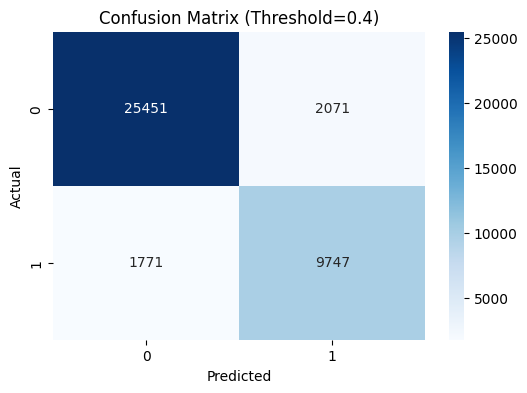

Confusion Matrix:
 [[25451  2071]
 [ 1771  9747]]


In [14]:
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold={THRESHOLD})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Confusion Matrix:\n", cm)

### 4. Classification Report

In [15]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     27522
           1       0.82      0.85      0.84     11518

    accuracy                           0.90     39040
   macro avg       0.88      0.89      0.88     39040
weighted avg       0.90      0.90      0.90     39040



### 5. ROC Curve + ROC–AUC

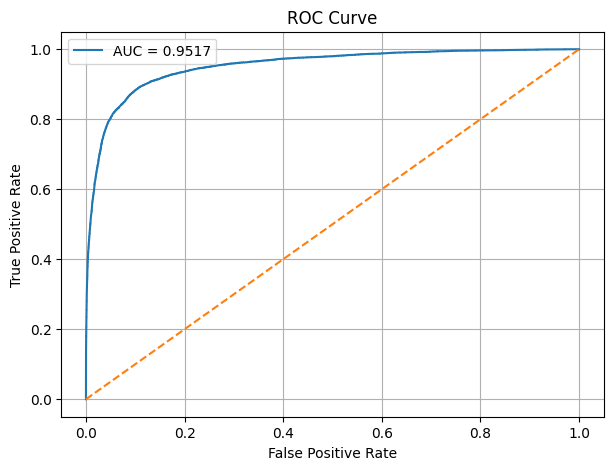

ROC–AUC Score: 0.9516870899245812


In [16]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print("ROC–AUC Score:", roc_auc)

### 6. Precision–Recall Curve + AUC

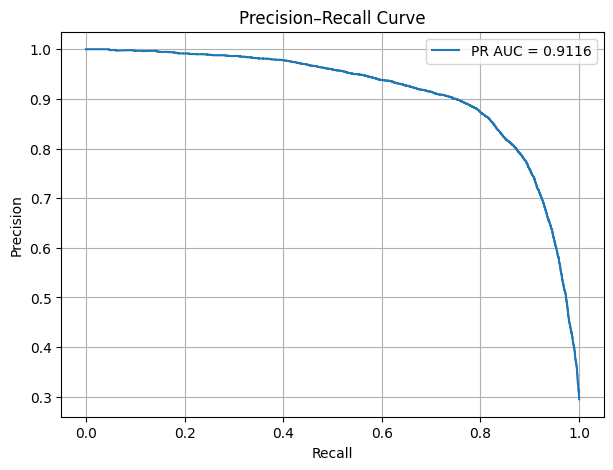

PR–AUC Score: 0.9115534164271184


In [17]:
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

print("PR–AUC Score:", pr_auc)


### 7. Final Metrics Summary

In [18]:
from sklearn.metrics import accuracy_score, f1_score

print("=== Final Evaluation Summary ===")
print("Threshold:", THRESHOLD)
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("ROC–AUC:", roc_auc)
print("PR–AUC:", pr_auc)


=== Final Evaluation Summary ===
Threshold: 0.4
Accuracy: 0.9015881147540984
F1 Score: 0.8353616729516626
ROC–AUC: 0.9516870899245812
PR–AUC: 0.9115534164271184
